In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/stats/ImplantFailure - dental implant failure_upload.csv")
df.head()

,Age,Gender,Systemic disease,Factors of missing,Tobacco smoking,Betel nut Chewing,Alcohol consumption,Departments,Surgeon experience,Location of implant,...,Timing of implant placement,Ridge augmentation,Maxillary sinus augmentation,Implant system,Fixture length,Fixture width,Types of prosthesis,Angle of abutment,Prosthesis fixation,Dental implant failure
0,69,0,0,2,0,0,0,1,5,4,...,2,1,0,0,10.0,4.1,0,0,0,1
1,42,0,0,1,0,0,0,1,6,1,...,1,1,0,0,12.0,4.1,0,0,0,1
2,43,0,0,1,0,0,0,1,7,4,...,2,1,0,0,10.0,3.3,0,0,0,1
3,43,0,0,1,0,0,0,1,7,5,...,2,1,0,0,8.0,4.1,0,0,0,1
4,43,0,0,1,0,0,0,1,7,5,...,2,1,0,0,10.0,4.1,0,0,0,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.isnull().sum()

Age                             0
Gender                          0
Systemic disease                0
Factors of missing              0
Tobacco smoking                 0
Betel nut Chewing               0
Alcohol consumption             0
Departments                     0
Surgeon experience              0
Location of implant             0
Bone density                    0
Timing of implant placement     0
Ridge augmentation              0
Maxillary sinus augmentation    0
Implant system                  0
Fixture length                  0
Fixture width                   0
Types of prosthesis             0
Angle of abutment               0
Prosthesis fixation             0
Dental implant failure          0
dtype: int64

In [ ]:
df.columns

Index(['Age', 'Gender', 'Systemic disease', 'Factors of missing',
       'Tobacco smoking', 'Betel nut Chewing', 'Alcohol consumption',
       'Departments', 'Surgeon experience', 'Location of implant',
       'Bone density', 'Timing of implant placement', 'Ridge augmentation',
       'Maxillary sinus augmentation', 'Implant system', 'Fixture length',
       'Fixture width', 'Types of prosthesis', 'Angle of abutment',
       'Prosthesis fixation', 'Dental implant failure'],
      dtype='object')

In [ ]:
print(df.dtypes)

Age                               int64
Gender                            int64
Systemic disease                  int64
Factors of missing                int64
Tobacco smoking                   int64
Betel nut Chewing                 int64
Alcohol consumption               int64
Departments                       int64
Surgeon experience                int64
Location of implant               int64
Bone density                      int64
Timing of implant placement       int64
Ridge augmentation                int64
Maxillary sinus augmentation      int64
Implant system                    int64
Fixture length                  float64
Fixture width                    object
Types of prosthesis               int64
Angle of abutment                 int64
Prosthesis fixation               int64
Dental implant failure            int64
dtype: object


In [ ]:
df.shape

(699, 21)

# Lr model

In [ ]:
independent_vars = df[['Age', 'Gender', 'Systemic disease', 'Factors of missing',
                       'Tobacco smoking', 'Betel nut Chewing', 'Alcohol consumption',
                       'Departments', 'Surgeon experience', 'Location of implant',
                       'Bone density', 'Timing of implant placement',
                       'Ridge augmentation', 'Maxillary sinus augmentation',
                       'Implant system', 'Fixture length', 'Fixture width',
                       'Types of prosthesis', 'Angle of abutment', 'Prosthesis fixation']]

dependent_var = df['Dental implant failure']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(independent_vars, dependent_var, test_size=0.2, random_state=42)

In [ ]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
X_test.shape

(140, 20)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8285714285714286


In [ ]:
target_names = {'implant failure': 1, 'implant success': 0}
dependent_var = dependent_var.map(target_names)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix with target names
print("Confusion Matrix:")
print(pd.DataFrame(cm, columns=['Predicted Implant Failure', 'Predicted Implant Success'],
                   index=['True Implant Failure', 'True Implant Success']))

Confusion Matrix:
                      Predicted Implant Failure  Predicted Implant Success
True Implant Failure                          0                         24
True Implant Success                          0                        116


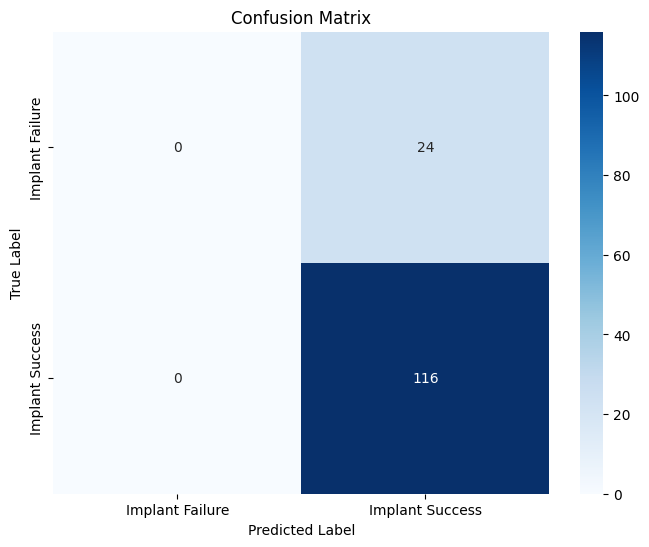

In [ ]:
target_names = ['Implant Failure', 'Implant Success']

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)

# Create a heatmap plot for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, cmap="Blues", fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

True Implant Failure (Actual Implant Failure): There are 24 cases where the model correctly predicted "Implant Failure" when the actual outcome was also "Implant Failure."

True Implant Success (Actual Implant Success): There are 116 cases where the model correctly predicted "Implant Success" when the actual outcome was also "Implant Success."

False Positive: There are 0 cases where the model incorrectly predicted "Implant Failure" when the actual outcome was "Implant Success." This means there were no false alarms for "Implant Failure."

False Negative: There are 0 cases where the model incorrectly predicted "Implant Success" when the actual outcome was "Implant Failure." This means there were no missed detections for "Implant Failure.

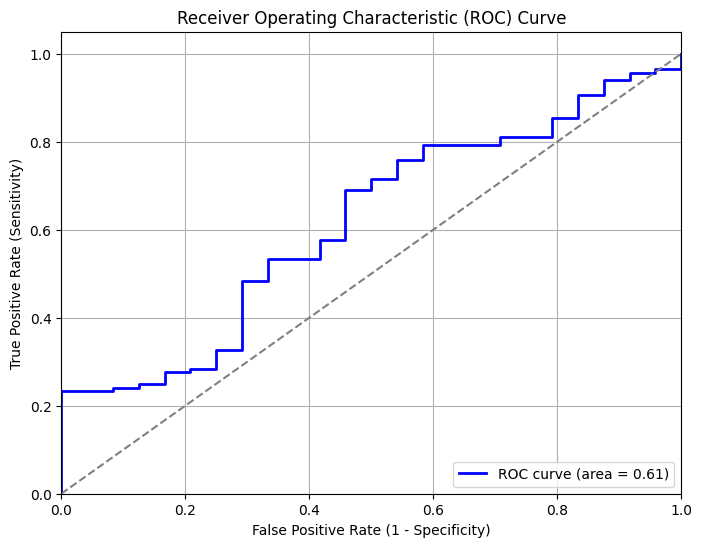

In [ ]:
y_probs = model1.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Lr Model (parameters tuning)

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

In [ ]:
grid = dict(solver=solvers, penalty=penalty, C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)

In [ ]:
grid_result = grid_search.fit(X_train, y_train)

In [ ]:
best_params = grid_result.best_params_
best_score = grid_result.best_score_

In [ ]:
print("Best Score: %f" % best_score)
print("Best Hyperparameters:", best_params)

Best Score: 0.957500
Best Hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
best_model = grid_result.best_estimator_

In [ ]:
y_probs = best_model.predict_proba(X_test)[:, 1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [ ]:
roc_auc = auc(fpr, tpr)

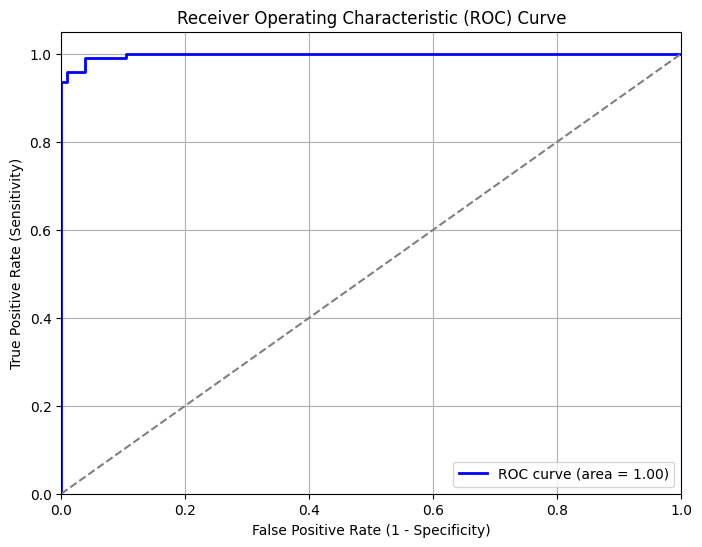

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Predict using the best model on the test set
y_pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.965


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(pd.DataFrame(conf_matrix, columns=['Predicted Implant Failure', 'Predicted Implant Success'],
                   index=['True Implant Failure', 'True Implant Success']))

Confusion Matrix:
                      Predicted Implant Failure  Predicted Implant Success
True Implant Failure                        102                          3
True Implant Success                          4                         91


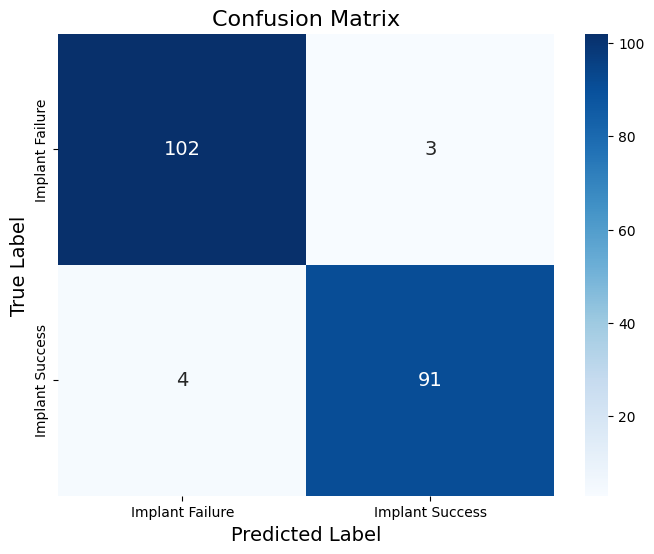

In [ ]:
# Assuming you have already defined y_test and y_pred
conf_matrix = confusion_matrix(y_test, y_pred)

# Define the class labels for the confusion matrix
class_labels = ['Implant Failure', 'Implant Success']

# Create a DataFrame from the confusion matrix
confusion_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='d', annot_kws={'size': 14})
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

Precision: The proportion of true positive predictions among all positive predictions.

Model 1 Precision: 91 / (91 + 3) ≈ 0.968

Model 2 Precision: 0 / (0 + 24) = 0


Recall (Sensitivity): The proportion of true positive predictions among all actual positive instances.

Model 1 Recall: 91 / (91 + 4) ≈ 0.958

Model 2 Recall: 0 / (0 + 116) = 0

F1-Score: The harmonic mean of precision and recall, which balances both metrics.

Model 1 F1-Score: 2 * (0.968 * 0.958) / (0.968 + 0.958) ≈ 0.963

Model 2 F1-Score: N/A (due to zero recall)

In [ ]:
# Accuracy
Accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(confusion_mat)



Accuracy: 96.50%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       105
           1       0.97      0.96      0.96        95

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200


Confusion Matrix:
[[102   3]
 [  4  91]]


In [ ]:
patient_df =  ['Age', 'Gender', 'Systemic disease', 'Factors of missing',
       'Bone density', 'Timing of implant placement', 'Ridge augmentation',
       'Maxillary sinus augmentation']

# Based on Patient Factor

In [ ]:
pts_df = df[['Age', 'Gender', 'Systemic disease', 'Factors of missing',
       'Tobacco smoking', 'Betel nut Chewing', 'Alcohol consumption',
          'Bone density', 'Timing of implant placement', 'Ridge augmentation',
       'Maxillary sinus augmentation']]

In [ ]:
pts_result_df = df[['Dental implant failure']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(pts_df, pts_result_df, test_size=0.2, random_state=42)

In [ ]:
model_pts = LogisticRegression()
model_pts.fit(X_train1, y_train1)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred1 = model_pts.predict(X_test1)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
cm = confusion_matrix(y_test1, y_pred1)

# Print the confusion matrix with target names
print("Confusion Matrix:")
print(pd.DataFrame(cm, columns=['Predicted Implant Failure', 'Predicted Implant Success'],
                   index=['True Implant Failure', 'True Implant Success']))

Confusion Matrix:
                      Predicted Implant Failure  Predicted Implant Success
True Implant Failure                          0                         26
True Implant Success                          0                        114


In [ ]:
X_test1.shape

(140, 11)

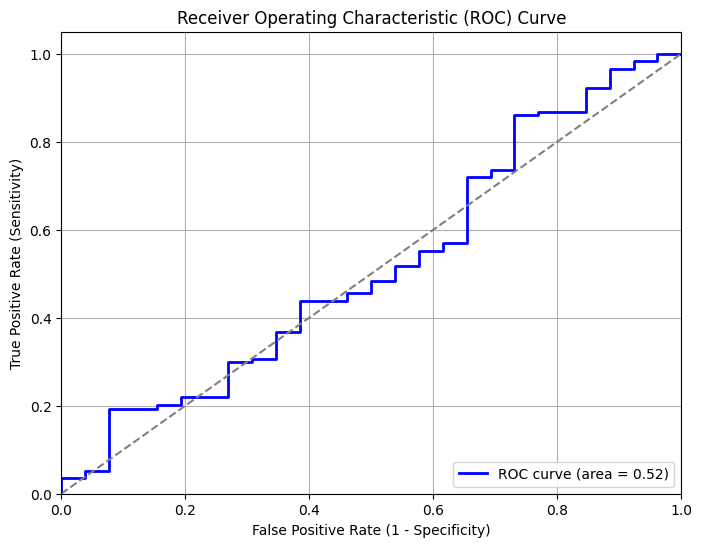

In [ ]:
y_probs1 = model_pts.predict_proba(X_test1)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test1, y_probs1)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.metrics import classification_report


Accuracy_pts = accuracy_score(y_test1, y_pred1)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(classification_report(y_test1, y_pred1))

# Confusion Matrix
confusion_mat = confusion_matrix(y_test1, y_pred1)
print("\nConfusion Matrix:")
print(confusion_mat)

Accuracy: 81.43%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.81      1.00      0.90       114

    accuracy                           0.81       140
   macro avg       0.41      0.50      0.45       140
weighted avg       0.66      0.81      0.73       140


Confusion Matrix:
[[  0  26]
 [  0 114]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Based on Dentists Factors

In [ ]:
den_df = df[['Age', 'Departments', 'Surgeon experience', 'Location of implant','Implant system',
             'Types of prosthesis', 'Angle of abutment', 'Prosthesis fixation']]

den_result_df = df[['Dental implant failure']]

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(den_df, den_result_df, test_size=0.2, random_state=42)

In [ ]:
model_den = LogisticRegression()
model_den.fit(X_train2, y_train2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_pred2 = model_den.predict(X_test2)

In [ ]:
cm_den = confusion_matrix(y_test2, y_pred2)

# Print the confusion matrix with target names
print("Confusion Matrix:")
print(pd.DataFrame(cm_den, columns=['Predicted Implant Failure', 'Predicted Implant Success'],
                   index=['True Implant Failure', 'True Implant Success']))

Confusion Matrix:
                      Predicted Implant Failure  Predicted Implant Success
True Implant Failure                          0                         26
True Implant Success                          0                        114


In [ ]:
X_test2.shape

(140, 8)

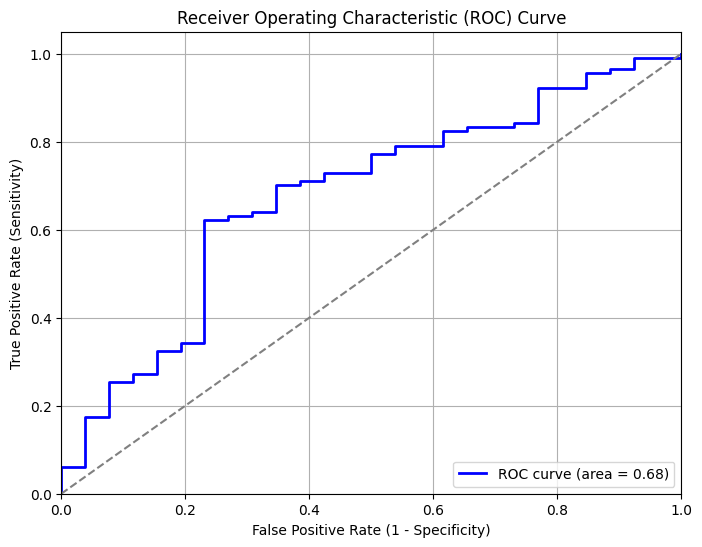

In [ ]:
y_probs2 = model_den.predict_proba(X_test2)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test2, y_probs2)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
Accuracy_pts = accuracy_score(y_test2, y_pred2)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("\nClassification Report:")
print(classification_report(y_test2, y_pred2))

# Confusion Matrix
confusion_mat = confusion_matrix(y_test2, y_pred2)
print("\nConfusion Matrix:")
print(confusion_mat)

Accuracy: 81.43%

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        26
           1       0.81      1.00      0.90       114

    accuracy                           0.81       140
   macro avg       0.41      0.50      0.45       140
weighted avg       0.66      0.81      0.73       140


Confusion Matrix:
[[  0  26]
 [  0 114]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
